In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
print("Загрузка данных...")
data = pd.read_csv("emnist.csv")

y = data.iloc[:, 0].values
x = data.iloc[:, 1:].values

y_normalized = y - np.min(y)
num_classes = len(np.unique(y_normalized))

print(f"Исходные метки: min={np.min(y)}, max={np.max(y)}")
print(f"Нормализованные метки: min={np.min(y_normalized)}, max={np.max(y_normalized)}")
print(f"Количество классов: {num_classes}")


Загрузка данных...
Исходные метки: min=1, max=26
Нормализованные метки: min=0, max=25
Количество классов: 26


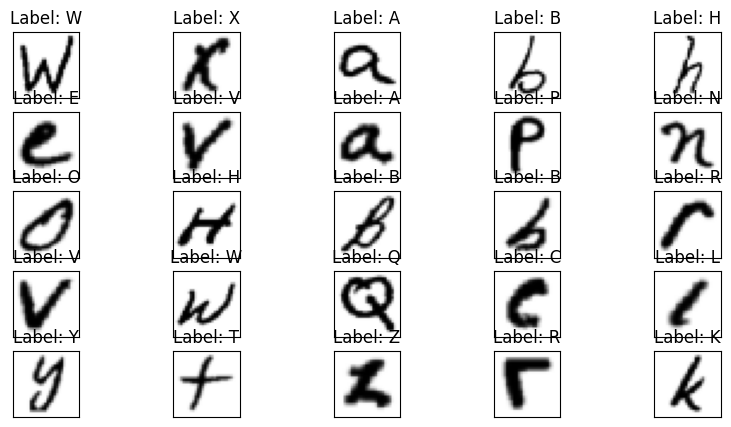

In [ ]:
def rotate_image(img):
    img = img.reshape(28, 28)
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

x_processed = np.array([rotate_image(img) for img in x])
x_processed = x_processed.astype("float32") / 255.0

y_cat = keras.utils.to_categorical(y_normalized, num_classes)

x_train, x_test, y_train, y_test = train_test_split(x_processed, y_cat, test_size=0.2, random_state=42)

def label_to_char(label):
    return chr(label + 65)

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = np.argmax(y_train[i])
    plt.title(f"Label: {label_to_char(label_index)}")

plt.show()

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

print(model.summary())

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc:.4f}")

pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(pred_classes == true_classes)
print(f"Общая точность: {accuracy:.4f}")

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7001 - loss: 1.0302 - val_accuracy: 0.8067 - val_loss: 0.6491
Epoch 2/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8340 - loss: 0.5494 - val_accuracy: 0.8442 - val_loss: 0.5141
Epoch 3/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8639 - loss: 0.4362 - val_accuracy: 0.8521 - val_loss: 0.4761
Epoch 4/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8809 - loss: 0.3747 - val_accuracy: 0.8669 - val_loss: 0.4369
Epoch 5/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8919 - loss: 0.3335 - val_accuracy: 0.8668 - val_loss: 0.4382
Epoch 6/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9017 - loss: 0.2996 - val_accuracy: 0.8721 - val_loss: 0.4269
Epoch 7/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9073 - loss: 0.2772 - val_accuracy: 0.8742 - val_loss: 0.4256
Epoch 8/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9145 - loss: 0.2558 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Результаты предсказания: [[8.2866381e-07 2.4959340e-10 3.9973886e-09 4.4890783e-07 1.4973961e-11
  9.2120565e-08 1.5264082e-02 4.1938464e-10 6.2199297e-06 7.5014514e-06
  5.5606986e-12 1.6553815e-05 1.5374367e-10 1.3422843e-07 2.5757458e-08
  4.0170326e-05 2.0073695e-02 3.6487158e-08 3.4015464e-09 8.2969700e-06
  8.8390806e-08 1.2512488e-06 8.6755394e-09 2.9056689e-06 9.6457756e-01
  9.7877582e-08]]
Предсказанный класс: 24 (Y)


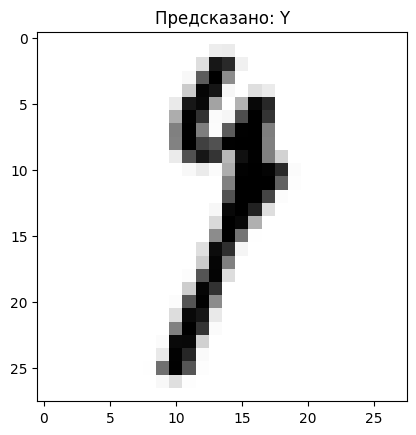

In [ ]:
n = 92
x_sample = np.expand_dims(x_test[n], axis=0)
res = model.predict(x_sample)
print("Результаты предсказания:", res)
predicted_class = np.argmax(res)
print(f"Предсказанный класс: {predicted_class} ({chr(predicted_class + 65)})")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title(f"Предсказано: {chr(predicted_class + 65)}")
plt.show()

In [174]:
model.save("emnist_model.h5")